 # Bank Customers Churn Prediction 
 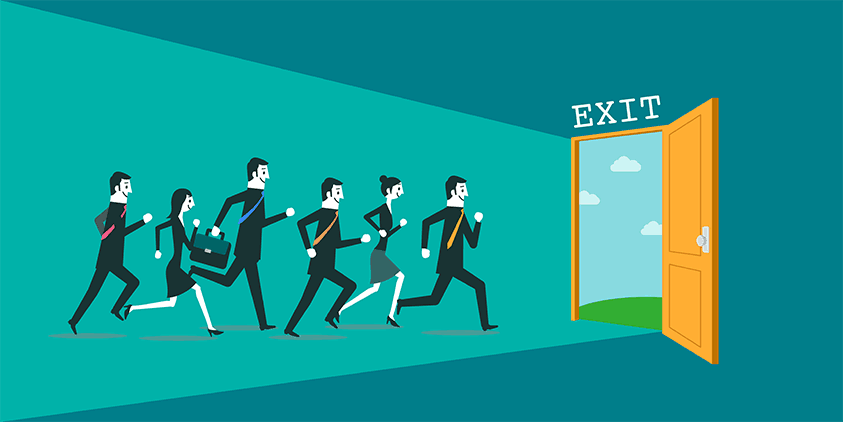

## Problem Statement
Customer retention is as crucial as customer acquisition when it comes to increasing revenue. Also we know,

it is much more expensive to sign in a new client than keeping an existing one.

It is advantageous for banks to know what leads a client towards the decision to leave the company. Also

churn prediction allows companies to develop loyalty programs and retention campaigns to keep as many

customers as possible so we have 3 tasks:
1. Analyze the customer churn rate for bank because it is useful to understand why the customers leave.
1. Predictive behavior modeling i.e. to classify if a customer is going to churn or not.
1. Choose the most reliable model that will attach a probability to the churn to make it easier for customer 

   service to target right customer in order to minimize their efforts to prevent churn.


## Importing Required Libraries







In [452]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Importing data

In [453]:
df = pd.read_csv("/content/churn.csv")

In [454]:
# Top 5 records
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [455]:
# Bottom 5 records
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


## Understanding the data

In [456]:
df.shape

(10000, 14)

There are 10,000 rows and 14 attributes present. Moving forward to Data Pre-processing, all these  attributes are
not necessary for our analysis and modeling will be dropped.

In [457]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [458]:
# Now let's see the data types of all 14 columns and non-nullvalues present in this data

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [459]:
# Unique values in each column

df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [460]:
# Checing null values 

df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

We can see that here is no null values present

In [461]:
# Duplication check

df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


No duplicates present

In [462]:
# Numerical Columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [463]:
# Categorical Columns

df.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


## Pre-Processing of Data

In [464]:
# Droping insignificant columns

df.drop(columns = ['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [465]:
df.shape

(10000, 11)

In [466]:
# Correlation Check

df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


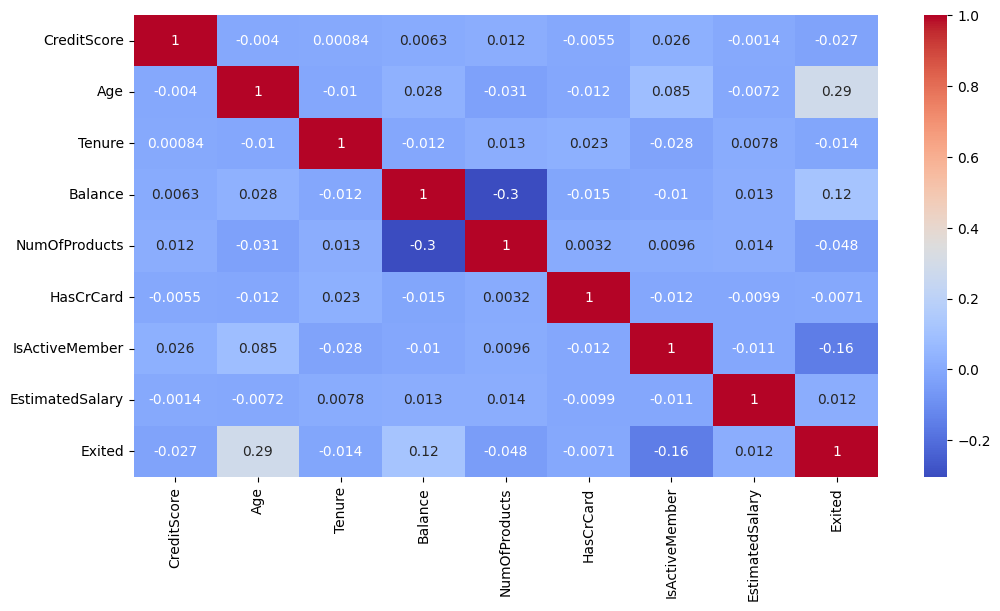

In [467]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),yticklabels=True,cbar=True,cmap='coolwarm',annot=True)
plt.show()

No two columns show a correlation greater than 0.75. So as theoretically suggested, we are good to go
here.

In [468]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Transforming Estimated Salary Column (For EDA)

In [469]:
conditions= [
    (df['EstimatedSalary'] <=25000 ),
    (df['EstimatedSalary'] >25000) & (df['EstimatedSalary'] <=50000),
    (df['EstimatedSalary'] >50000) & (df['EstimatedSalary'] <=75000),
    (df['EstimatedSalary'] > 75000) & (df['EstimatedSalary'] <= 100000),
    (df['EstimatedSalary'] > 100000) & (df['EstimatedSalary'] <= 125000),
    (df['EstimatedSalary'] > 125000) & (df['EstimatedSalary'] <= 150000),
    (df['EstimatedSalary'] > 150000) & (df['EstimatedSalary'] <= 1750000),
    (df['EstimatedSalary'] > 175000) & (df['EstimatedSalary'] <= 200000)
]

values = ['Less than 25000', '25,000-50,000','50,000-75,000','75,000-1,00,000','1,00,000-1,25,000',
           '1,25,000-1,50,000','1,50,000-1,75,000','1,75,000-2,00,000' ]
    
df['SalaryRange'] = np.select(conditions,values)

In [470]:
df['SalaryRange'].value_counts()

1,50,000-1,75,000    2455
1,25,000-1,50,000    1279
1,00,000-1,25,000    1276
50,000-75,000        1269
75,000-1,00,000      1268
25,000-50,000        1236
Less than 25000      1217
Name: SalaryRange, dtype: int64

## Transforming Age Column (For EDA) 

In [471]:
conditions = [
        (df['Age'] >= 0) & (df['Age'] <= 18),
        (df['Age'] >= 18) & (df['Age'] < 30),
        (df['Age'] >= 30) & (df['Age'] < 40),
        (df['Age'] >= 40) & (df['Age'] < 50),
        (df['Age'] >= 50) & (df['Age'] < 60),
        (df['Age'] >= 60)
]

values = ['Minors', '18-30', '30-40','40-50','50-60','>60']

df['AgeGroup'] = np.select(conditions,values)

In [472]:
df['AgeGroup'].value_counts()

30-40     4346
40-50     2618
18-30     1619
50-60      869
>60        526
Minors      22
Name: AgeGroup, dtype: int64

In [473]:
# Storing Numerical column names to a variable
numerical= [ i for i in df.columns if df[i].dtype!='O']
print("The numerical variable are",numerical)

The numerical variable are ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


## Analysing By Graph

In [474]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,SalaryRange,AgeGroup
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,"1,00,000-1,25,000",40-50
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,"1,00,000-1,25,000",40-50
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,"1,00,000-1,25,000",40-50
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,"75,000-1,00,000",30-40
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,"75,000-1,00,000",40-50


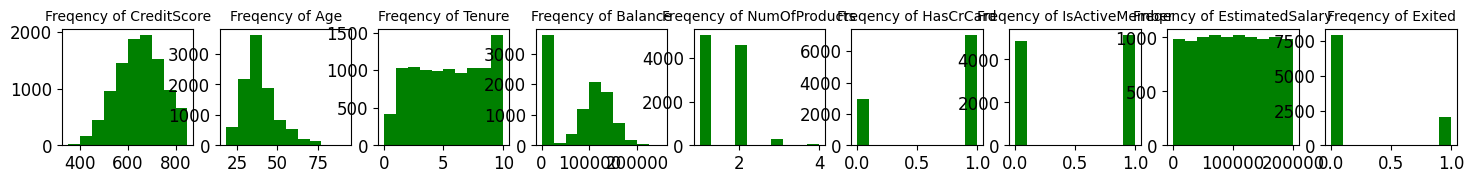

In [475]:
plt.figure(figsize=(18,16))
plotnumber=1
for i in numerical:

    ax1=plt.subplot(9,9,plotnumber)
    plt.hist(df[i],color='green')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title('Freqency of '+i,fontsize=10)
    plotnumber +=1

(array([ 611., 2179., 3629., 1871.,  828.,  523.,  208.,  127.,   20.,
           4.]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <BarContainer object of 10 artists>)

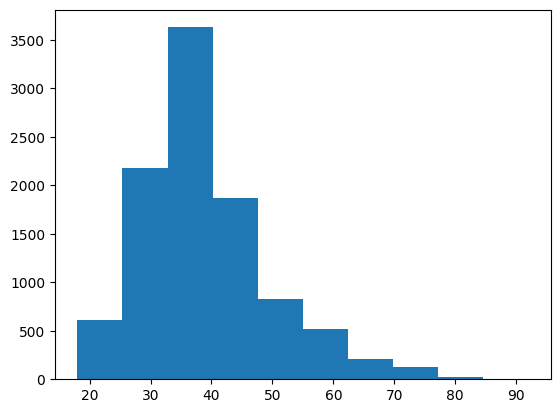

In [476]:
plt.hist(df['Age'])

Age column is skewed.


In [477]:
# Right skewed

df['Age'].skew()

1.0113202630234552

In [478]:
# Log transformation to handle right skewed data

df['Age1'] = np.log(df['Age'])

<Axes: ylabel='Density'>

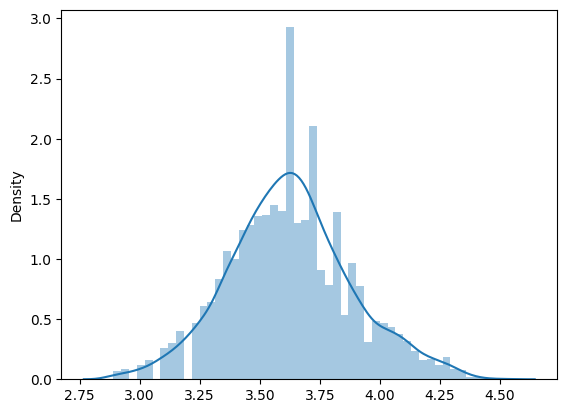

In [479]:
# After log transformation
sns.distplot(x=df['Age1'])


Here our main interest is to get an understanding as to how the given attributes relate
to the 'Exit' status.

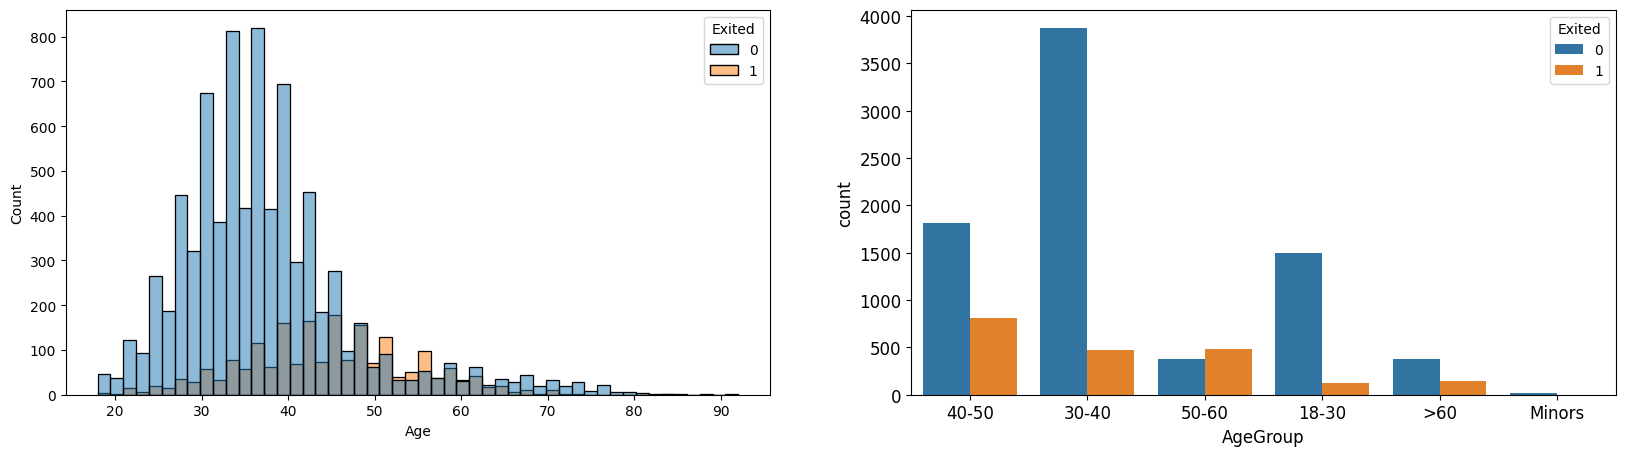

In [480]:
fig, axarr = plt.subplots(1,2, figsize=(20, 5))
plt.xticks(size=12)
plt.xlabel('Age Groups',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
sns.histplot(data=df,x='Age',hue='Exited',bins=50,ax=axarr[0])
plt.xticks(size=12)
plt.xlabel('Age Groups',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
sns.countplot(data=df,x ='AgeGroup',hue='Exited',ax=axarr[1])
plt.show()

Insight: 40-50 is the age group for which churn rate is maximum. Also for age group
50-60 customers churned is more than customer retention.The bank may need to
review their target market or review the strategy for retention between the different
age groups

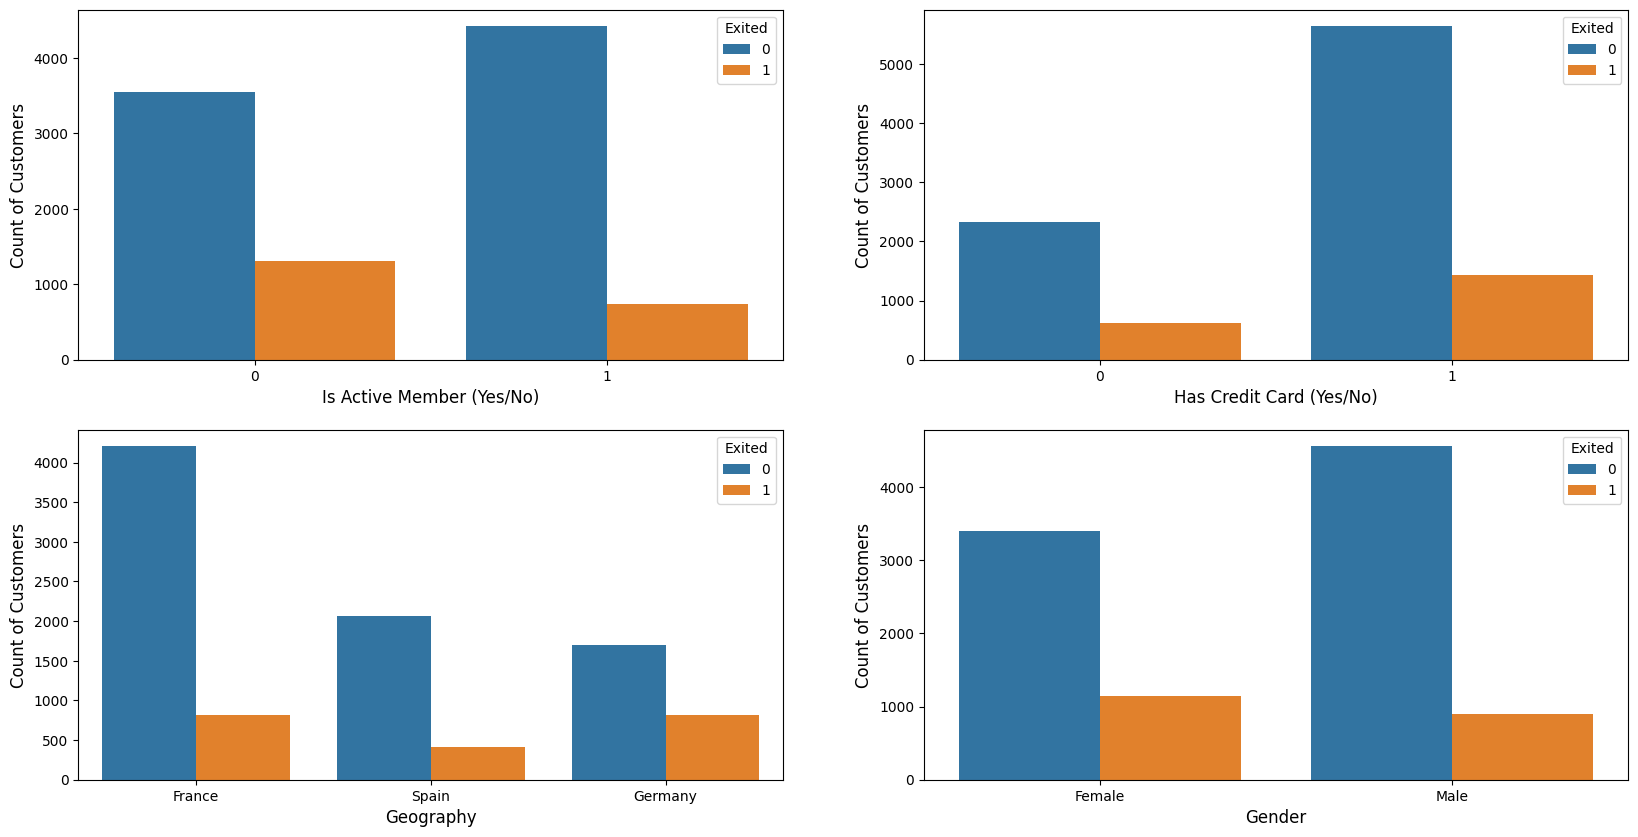

In [481]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 10))

# plot 1
sns.countplot(data=df, x='IsActiveMember', hue='Exited', ax=axarr[0][0])
axarr[0][0].set_xlabel('Is Active Member (Yes/No)', size=12)
axarr[0][0].set_ylabel('Count of Customers', size=12)


# plot 2
sns.countplot(data=df, x='HasCrCard', hue='Exited', ax=axarr[0][1])
axarr[0][1].set_xlabel('Has Credit Card (Yes/No)', size=12)
axarr[0][1].set_ylabel('Count of Customers', size=12)


# plot 3
sns.countplot(data=df, x='Geography', hue='Exited', ax=axarr[1][0])
axarr[1][0].set_xlabel('Geography', size=12)
axarr[1][0].set_ylabel('Count of Customers', size=12)


# plot 4
sns.countplot(data=df, x='Gender', hue='Exited', ax=axarr[1][1])
axarr[1][1].set_xlabel('Gender', size=12)
axarr[1][1].set_ylabel('Count of Customers', size=12)


plt.show()

### Insights:
1. Chances of a non-active member churning out is double the chances of an active member churning out.
Bank needs to check with the customers for being inactive , give them some offers plan.
2. Majority of the customers that churned are those with credit cards. Given that majority of the customers
have credit cards could prove this to be just a coincidence.
3. Almost half of the customers are from France followed by Spain and Germany
customers.Churn rate is also maximum for France there but Germany showed the same churn
rate despite lower count of customers.
4. .Clearly shows that  churn probability is more for a female
customer

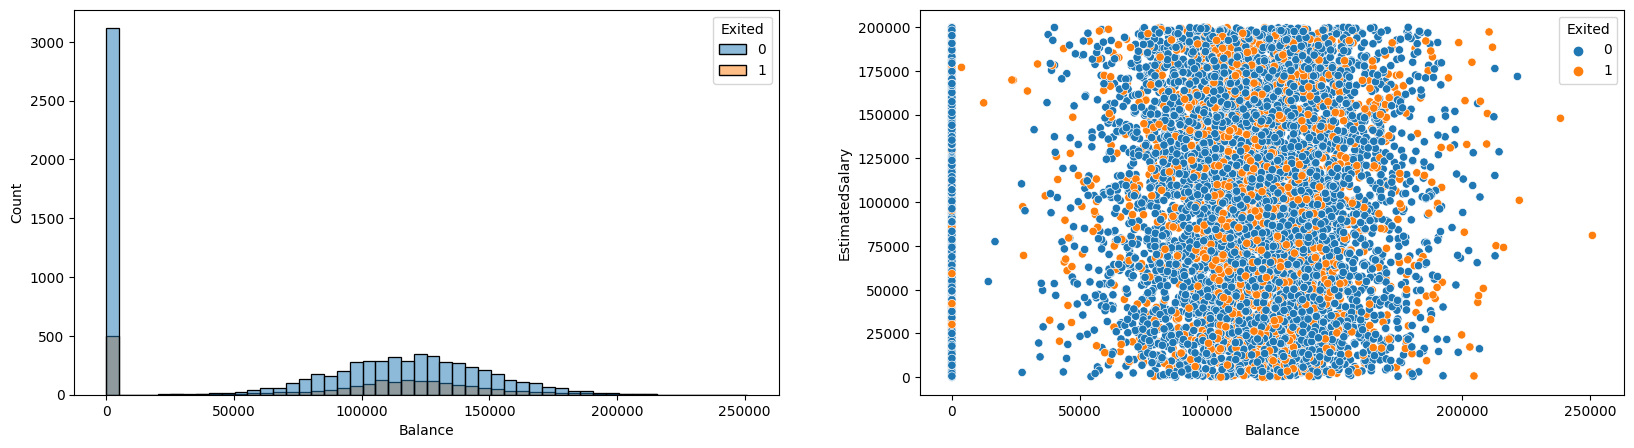

In [482]:
fig, axarr = plt.subplots(1, 2, figsize=(20, 5))

sns.histplot(data=df, x='Balance', hue='Exited', bins=50, ax=axarr[0])
sns.scatterplot(data=df, x='Balance', y='EstimatedSalary', hue='Exited', ax=axarr[1])

plt.show()

Insights: Probability of customers having zero balance churning out is maximum.Many
people keep 0 balance no matter how high or low their estimated salary is.

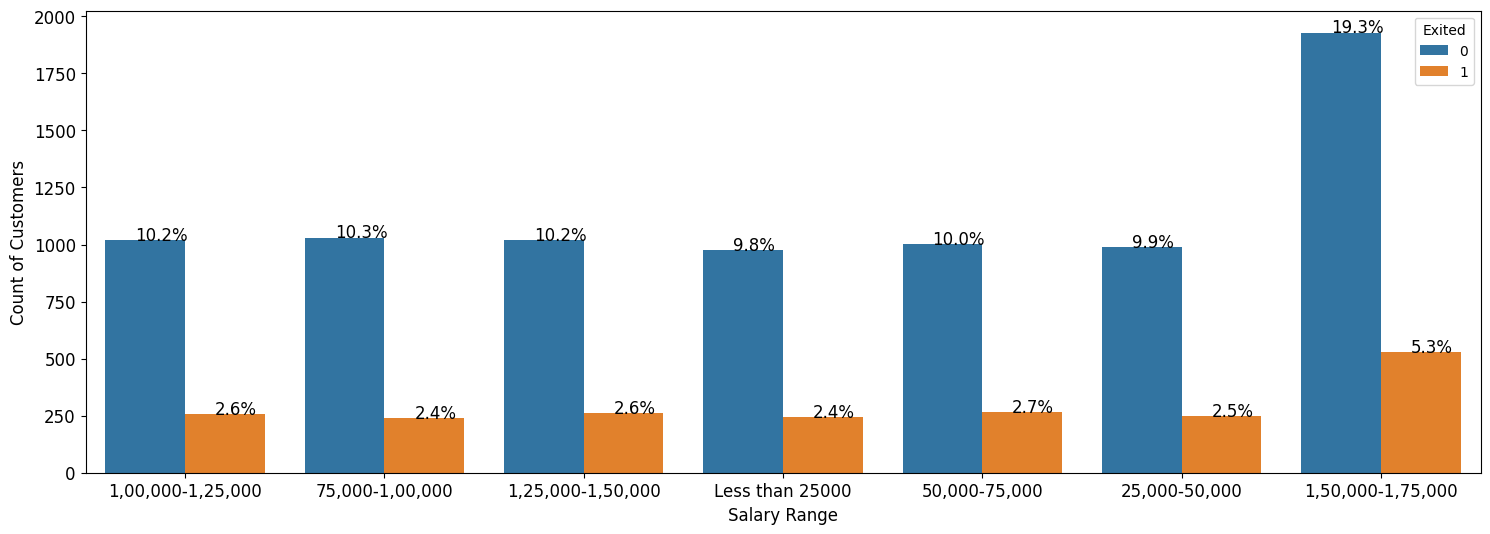

In [483]:
plt.figure(figsize=(18,6))
ax = sns.countplot(data=df,x='SalaryRange',hue='Exited')
plt.xticks(size=12)
plt.xlabel('Salary Range',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
total = len(df['SalaryRange'])
for p in ax.patches:
 percentage = '{:.1f}%'.format(100 * p.get_height()/total)
 x = p.get_x() + p.get_width() / 2 - 0.05
 y = p.get_y() + p.get_height()
 ax.annotate(percentage, (x, y), size = 12)
plt.show()

Insights: Around one-fourth customers have salary between 150000-175000 and more
churn rate for these customers is observed which shows bank is losing it's valuable
customers.

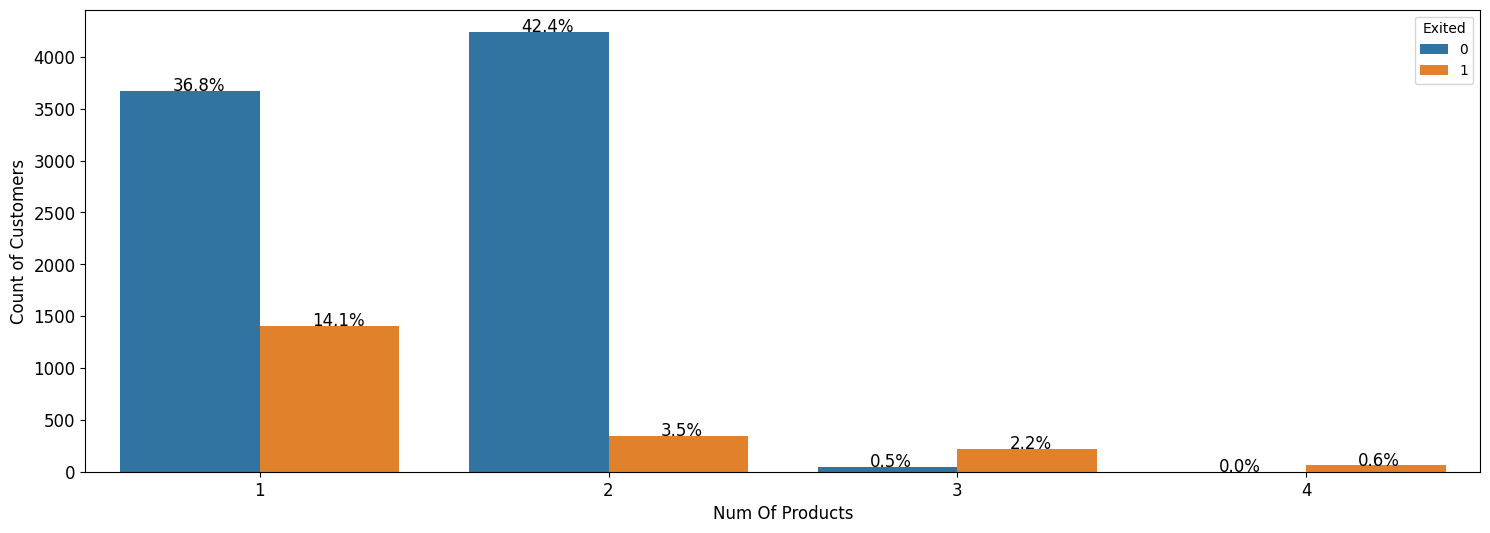

In [484]:
plt.figure(figsize=(18,6))
ax = sns.countplot(data=df,x='NumOfProducts',hue='Exited')
plt.xticks(size=12)
plt.xlabel('Num Of Products',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
total = len(df['NumOfProducts'])
for p in ax.patches:
 percentage = '{:.1f}%'.format(100 * p.get_height()/total)
 x = p.get_x() + p.get_width() / 2 - 0.05
 y = p.get_y() + p.get_height()
 ax.annotate(percentage, (x, y), size = 12)
plt.show()

Insight: Maximum customers who churned out have used 1 product only (14% out of
total 20%). Maybe bank needs to focus on convincing customers to use more of their
services and products.


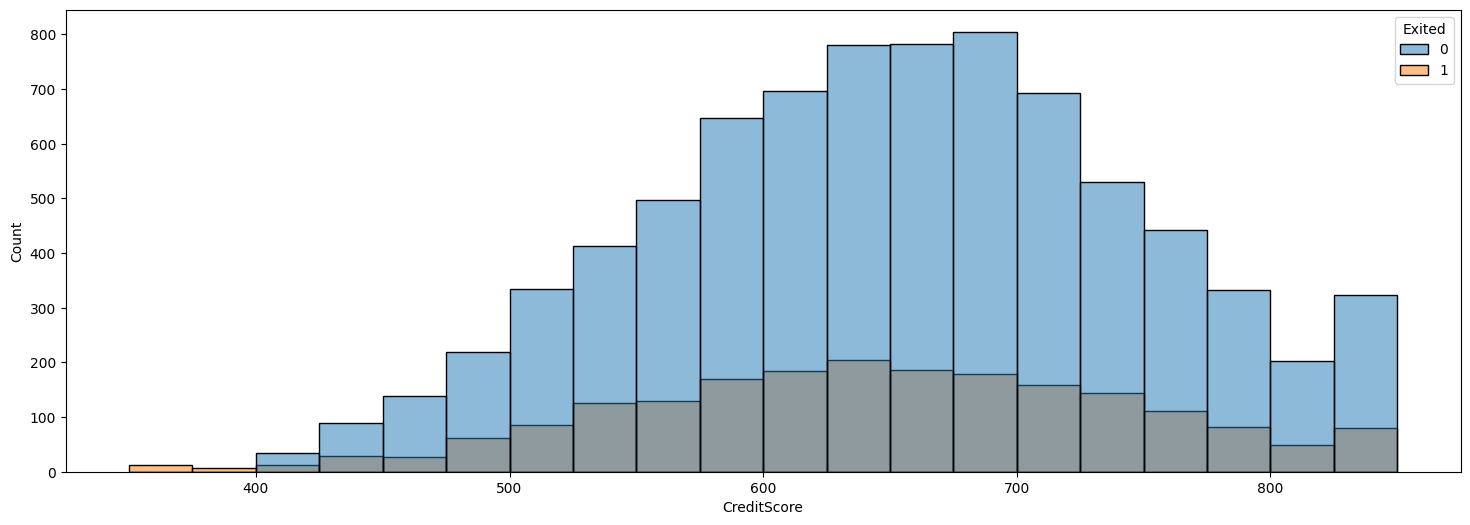

In [485]:
plt.figure(figsize=(18,6))
sns.histplot(data=df,x='CreditScore',bins=20,hue='Exited')
plt.show()

There is no significant difference in the credit score distribution between retained and
churned customers.


In [486]:
# Drop the columns formed for EDA as it's no longer needed. Also drop age and keep the loged 'age1'

df.drop(columns=['SalaryRange','AgeGroup','Age'],inplace=True)

## Target check for balanced or Imbalanced data

In [487]:
round(df['Exited'].value_counts()/len(df)*100,2)

0    79.63
1    20.37
Name: Exited, dtype: float64

80 percent of the data belongs to retained class .It is Imbalanced data .


Solution : Use SMOTE to handle this or the Precision -Recall curve should
be used not accuracy .


## Predictive Behaviour Modeling
About 20% of the customers have churned. We need to ensure that the
chosen model does predict with great accuracy this 20% as it is of
interest to the bank to identify and keep this bunch as opposed to
accurately predicting the customers that are retained.


In [488]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler


In [489]:
# df['Gender'] = df['Gender'].replace({'Male':1,'Female':0})
# df['Geography'] = df['Geography'].replace({'Germany':1,'France':0,'Spain':2})
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

df['Geography'] = df['Geography'].map({
    'Germany': 0,
    'Spain': 1,
    'France': 2
})

In [490]:
# Input and Output data seperating

x = df.drop(columns=['Exited'],axis=1)
y = df['Exited']

In [491]:
# Training and Testing data seperating

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)
print("Shape of X_train:" ,x_train.shape)
print("Shape of X_test:" ,x_test.shape)

Shape of X_train: (8000, 10)
Shape of X_test: (2000, 10)


In [492]:
# Normalizing values

scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [493]:
x_train

array([[ 0.35649971,  0.90598864,  0.91324755, ...,  0.97481699,
         1.36766974, -0.62093383],
       [-0.20389777, -1.50315516,  0.91324755, ...,  0.97481699,
         1.6612541 ,  0.42768463],
       [-0.96147213, -0.29858326,  0.91324755, ..., -1.02583358,
        -0.25280688, -1.73028039],
       ...,
       [ 0.86500853,  0.90598864, -1.09499335, ..., -1.02583358,
        -0.1427649 ,  0.04174734],
       [ 0.15932282,  0.90598864,  0.91324755, ..., -1.02583358,
        -0.05082558,  0.51842187],
       [ 0.47065475, -1.50315516,  0.91324755, ...,  0.97481699,
        -0.81456811,  1.17638025]])

## SMOTE

In [494]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)

over = SMOTE(sampling_strategy='auto', random_state=42)
x_train, y_train = over.fit_resample(x_train, y_train)

y_train.value_counts()

0    6356
1    6356
Name: Exited, dtype: int64

In [495]:
y_train

0        0
1        0
2        1
3        1
4        1
        ..
12707    1
12708    1
12709    1
12710    1
12711    1
Name: Exited, Length: 12712, dtype: int64

In [496]:
x_train

array([[ 0.35649971,  0.90598864,  0.91324755, ...,  0.97481699,
         1.36766974, -0.62093383],
       [-0.20389777, -1.50315516,  0.91324755, ...,  0.97481699,
         1.6612541 ,  0.42768463],
       [-0.96147213, -0.29858326,  0.91324755, ..., -1.02583358,
        -0.25280688, -1.73028039],
       ...,
       [ 0.40244673, -0.29858326, -1.09499335, ..., -1.02583358,
         1.45598992,  0.62702254],
       [-0.99198604, -0.52413109, -1.09499335, ...,  0.97481699,
         0.06590195,  0.94585557],
       [-0.39249846,  0.10518919,  0.91324755, ..., -1.02583358,
         0.57385644,  0.54694203]])

**KNN Model**

In [497]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(x_train,y_train)
y_pred_k=knn_model.predict(x_test)
y_pred_k

array([0, 0, 0, ..., 1, 0, 1])

Performance Evaluating

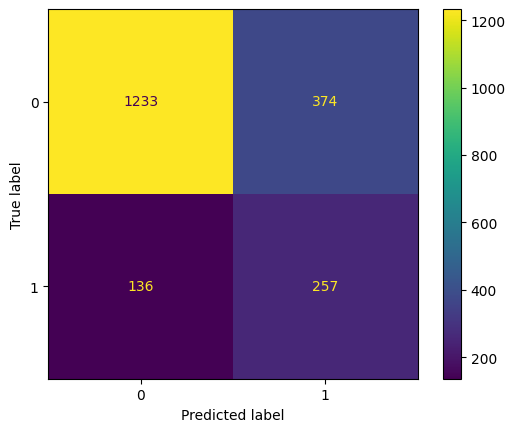

In [498]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred_k)
labels = [0,1]
cmd = ConfusionMatrixDisplay(cm,display_labels=labels)
cmd.plot()

In [499]:
score_k = accuracy_score(y_test,y_pred_k)
print(f'Accuracy score of this model is {score_k}')

Accuracy score of this model is 0.745


In [500]:
report_k = classification_report(y_test,y_pred_k)
print(report_k)

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1607
           1       0.41      0.65      0.50       393

    accuracy                           0.74      2000
   macro avg       0.65      0.71      0.67      2000
weighted avg       0.80      0.74      0.76      2000



**Random Forest Model**

In [501]:
from sklearn.ensemble import RandomForestClassifier
random_forest= RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

random_forest.fit(x_train,y_train)
y_pred_r=random_forest.predict(x_test)
y_pred_r

array([0, 0, 0, ..., 1, 0, 1])

Performance Evaluating

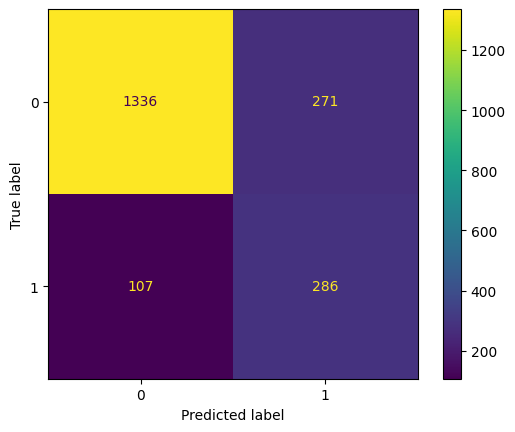

In [502]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred_r)
labels = [0,1]
cmd = ConfusionMatrixDisplay(cm,display_labels=labels)
cmd.plot()

In [503]:
score_r = accuracy_score(y_test,y_pred_r)
print(f'Accuracy score of this model is {score_r}')

Accuracy score of this model is 0.811


In [504]:
report_k = classification_report(y_test,y_pred_r)
print(report_k)

              precision    recall  f1-score   support

           0       0.93      0.83      0.88      1607
           1       0.51      0.73      0.60       393

    accuracy                           0.81      2000
   macro avg       0.72      0.78      0.74      2000
weighted avg       0.84      0.81      0.82      2000



**Decision Tree Model**

In [505]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=6, criterion = "entropy",
                                      max_features= None,min_samples_split=15,min_samples_leaf=12)
decision_tree.fit(x_train,y_train)
y_pred = decision_tree.predict(x_test)
y_pred


array([0, 0, 0, ..., 1, 0, 1])

Performance Evaluating

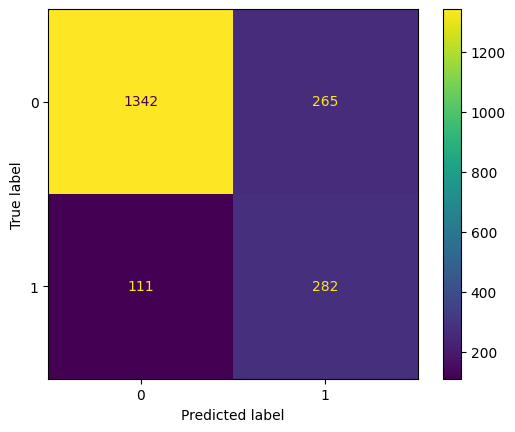

In [506]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)
labels = [0,1]
cmd = ConfusionMatrixDisplay(cm,display_labels=labels)
cmd.plot()

In [507]:
score = accuracy_score(y_test,y_pred)
print(f'Accuracy score of this model is {score}')

Accuracy score of this model is 0.812


In [508]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1607
           1       0.52      0.72      0.60       393

    accuracy                           0.81      2000
   macro avg       0.72      0.78      0.74      2000
weighted avg       0.84      0.81      0.82      2000



**From above these 3 models, Decision Tree Classifier Model and Random Classifier Model has an accuracy greater than 75 percentage.**